# Movies - EDA and Correlations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
movies = pd.read_csv(r"C:\Users\Hardik Sachdeva\Documents\Python\datasets\movies.csv")

In [3]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [5]:
#Checking for missing data
movies.isna().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

<AxesSubplot:>

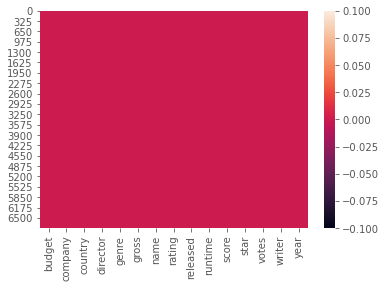

In [6]:
sns.heatmap(movies.isna())

No missing values in the dataset

## Cleaning the Data

The values in year column for some movies does not match the year in released columns. Therefore, deleting this column and creating a new column for the correct year

In [7]:
del movies['year']

In [8]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce


In [9]:
movies['released']=pd.to_datetime(movies['released'])

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   float64       
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   float64       
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 746.1+ KB


In [11]:
# New year column with year taken from released column
movies['year']=pd.DatetimeIndex(movies.released).year

In [12]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [13]:
movies['budget']=movies['budget'].astype('int64')
movies['gross']=movies['gross'].astype('int64')

In [14]:
movies.drop_duplicates(inplace=True)

## Finding correlations

In [15]:
movies.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.220797
year,0.274820,0.176879,0.088342,0.117679,0.220797,1.000000


<AxesSubplot:xlabel='budget', ylabel='gross'>

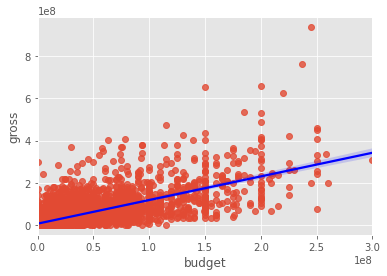

In [16]:
sns.regplot(x='budget',y='gross',data=movies,line_kws={'color':'blue'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

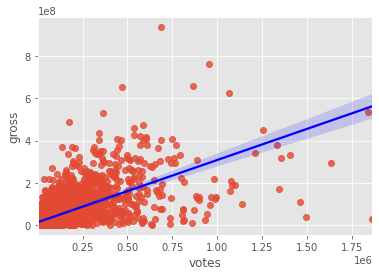

In [17]:
sns.regplot(x='votes',y='gross',data=movies,line_kws={'color':'blue'})

<AxesSubplot:xlabel='score', ylabel='gross'>

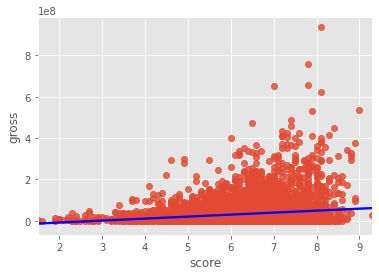

In [18]:
sns.regplot(x='score',y='gross',data=movies,line_kws={'color':'blue'})

<AxesSubplot:xlabel='year', ylabel='gross'>

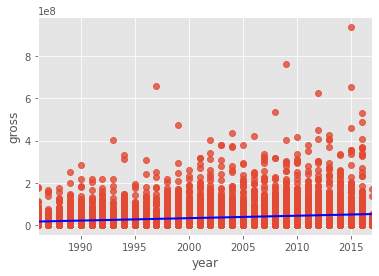

In [19]:
sns.regplot(x='year',y='gross',data=movies,line_kws={'lw':2,'color':'blue'})

<AxesSubplot:>

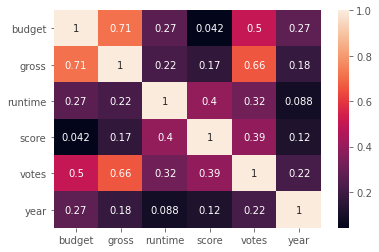

In [20]:
sns.heatmap(movies.corr(),annot=True)

There is high correlation between budget and gross and also between votes and gross which means that gross revenue of the movie is highly affected by these two factors i.e. budget and gross. Positive correlation means with increase, decrease in one value the other also increases, decreases respectively.

# 

#### Top 10 movies

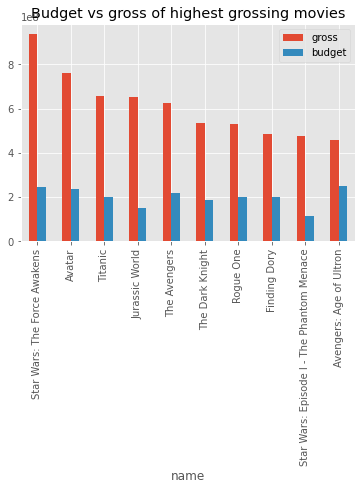

In [21]:
movies.nlargest(10,'gross').plot(x='name',y=['gross','budget'],kind='bar')
plt.title('Budget vs gross of highest grossing movies')
plt.show()

In [22]:
top = movies.groupby('star')['gross'].sum().reset_index(name='Total gross')

In [23]:
top

,star,Total gross
0,'Weird Al' Yankovic,6157157
1,50 Cent,30981850
2,A.J. Cook,46961214
3,Aaliyah,30336800
4,Aamir Khan,37754669
...,...,...
2499,Zoey Deutch,68060721
2500,Zooey Deschanel,32940086
2501,�lex Angulo,15324
2502,�lodie Bouchez,917915


#### Top 10 actors

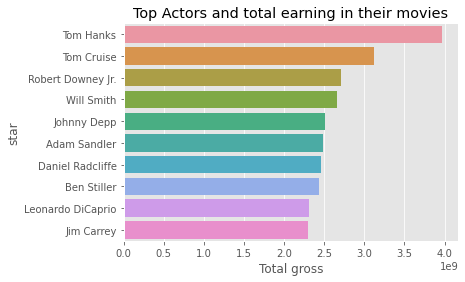

In [24]:
# plot of total revenue of all movies vs the top actors 
sns.barplot(x='Total gross',y='star',data=top.nlargest(10,'Total gross'))
plt.title('Top Actors and total earning in their movies')
plt.show()

### Top rated movies

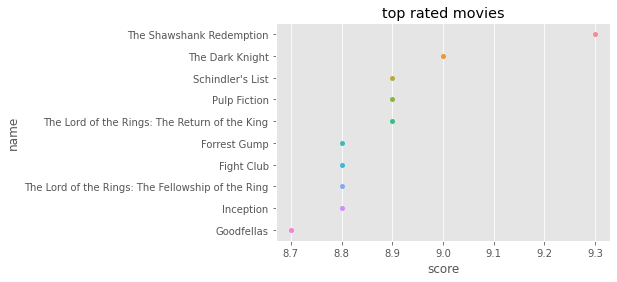

In [25]:
sns.swarmplot(x='score',y='name',data=movies.nlargest(10,['score']))
plt.title('top rated movies')
plt.show()

### top voted movies

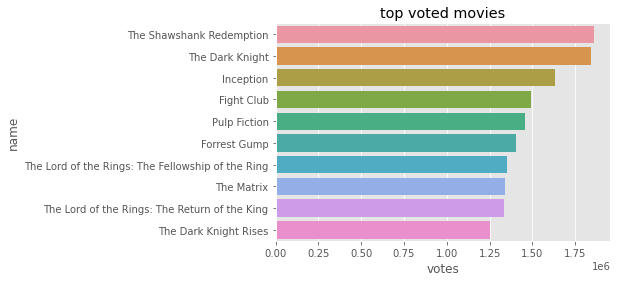

In [26]:
sns.barplot(x='votes',y='name',data=movies.nlargest(10,['votes']))
plt.title('top voted movies')
plt.show()

In [27]:
topg = movies.groupby('genre')['gross'].sum().reset_index(name='Total gross')

In [28]:
topg

,genre,Total gross
0,Action,74792634664
1,Adventure,20895092830
2,Animation,25342203262
3,Biography,8617526666
4,Comedy,53543423603
5,Crime,10217836159
6,Drama,25204622256
7,Family,118110208
8,Fantasy,644653115
9,Horror,7117846856


#### Most appreciated genres

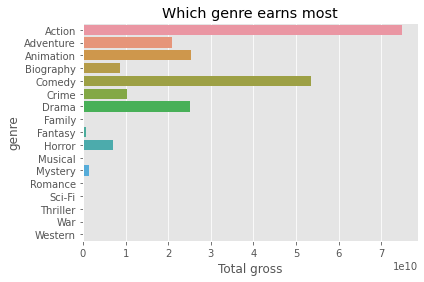

In [29]:
sns.barplot(x='Total gross',y='genre',data=topg)
plt.title('Which genre earns most')
plt.show()

Action movies seem to earn better than any other genres.

In [30]:
topc = movies.groupby('company')['gross'].sum().reset_index(name='Total gross')

#### Highest earning companies

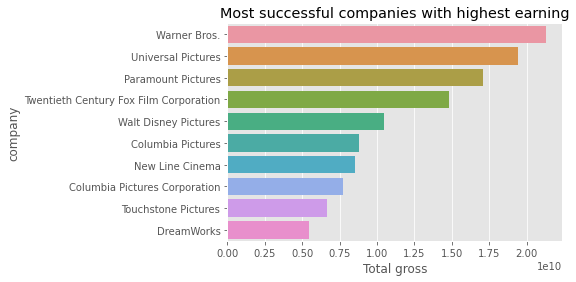

In [31]:
sns.barplot(x='Total gross',y='company',data=topc.nlargest(10,['Total gross']))
plt.title('Most successful companies with highest earning')
plt.show()

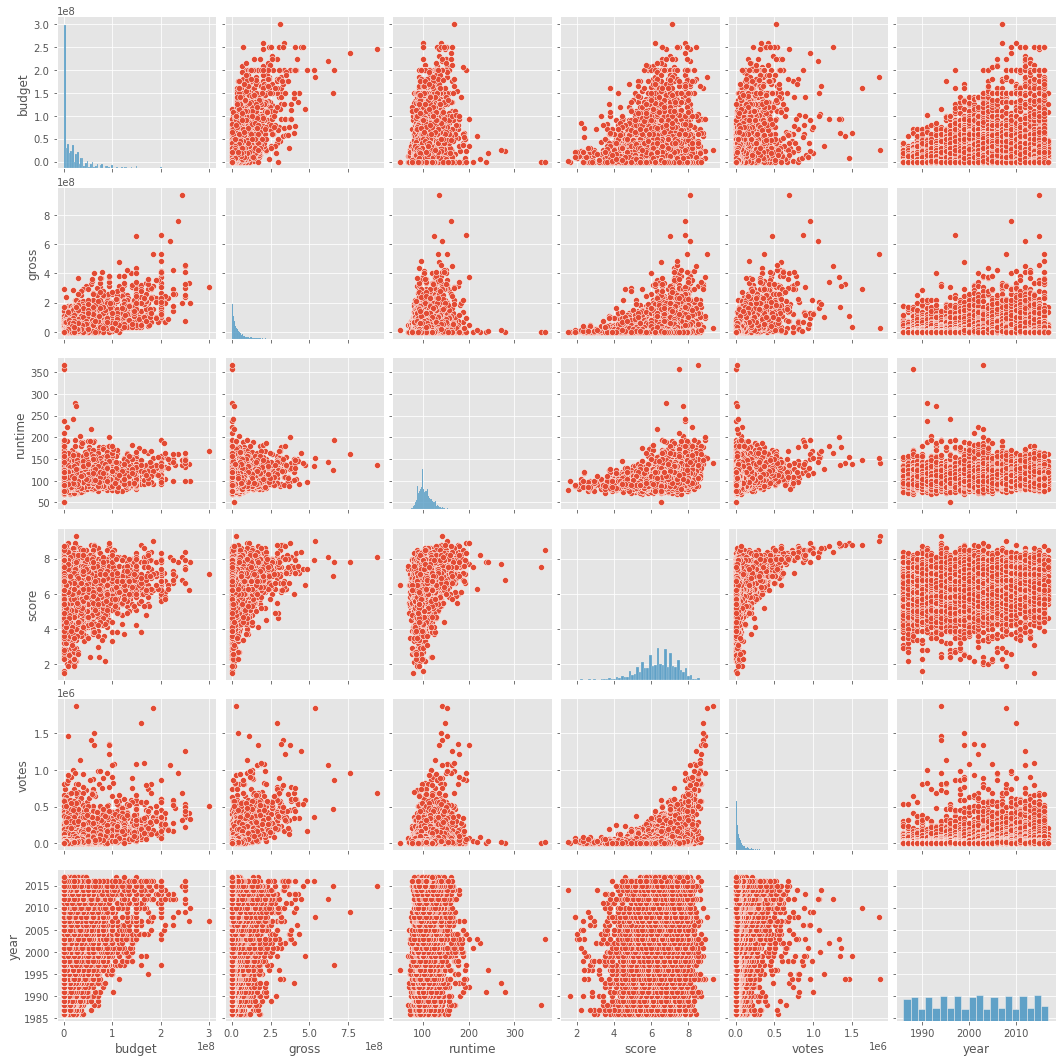

In [32]:
sns.pairplot(movies)